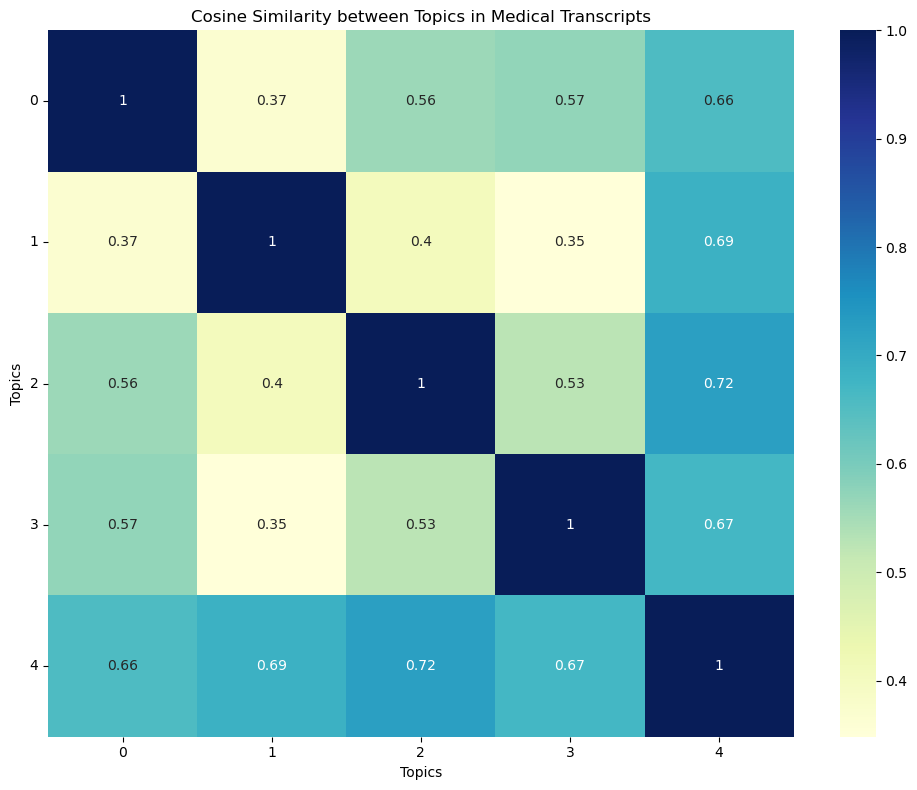

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample medical transcripts (replace with your actual transcripts)
medical_transcripts = [
    "Patient presented with symptoms of cough and shortness of breath.",
    "Physical examination revealed elevated temperature and wheezing.",
    "Diagnosis confirmed as bronchitis, prescribed antibiotics and inhaler.",
    "Patient complains of chest pain and difficulty breathing.",
    "Lab results indicate high levels of inflammation.",
    "Treatment plan includes rest, hydration, and pain management.",
    "Patient discharged with instructions to follow up in one week.",
    "Patient history includes hypertension and diabetes.",
    "X-ray shows signs of pneumonia in the left lung.",
    "Administered IV fluids and antibiotics.",
    "Scheduled for follow-up appointment with primary care physician.",
    "Family history of heart disease and asthma.",
    "Performed ECG to monitor heart function.",
    "Patient referred to cardiologist for further evaluation.",
    "Recommend lifestyle changes and medication adherence."
]

# Convert text data to document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(medical_transcripts)

# Topic modeling using Latent Dirichlet Allocation (LDA)
num_topics = 5  # Number of topics (adjust as needed)
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Get the topic-term matrix
topic_term_matrix = lda.components_

# Calculate cosine similarity between topics
topic_similarity = cosine_similarity(topic_term_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(topic_similarity, annot=True, cmap='YlGnBu', xticklabels=np.arange(num_topics), yticklabels=np.arange(num_topics))
plt.title('Cosine Similarity between Topics in Medical Transcripts')
plt.xlabel('Topics')
plt.ylabel('Topics')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
